<a href="https://colab.research.google.com/github/Manish4212/manish/blob/patato_leaf/potato_leaf_detection15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import zipfile
import os

# Path to the zip file (assuming it's located in /content directory)
zip_path = '/content/PlantVillage.zip'

# Directory to extract the contents (you can change this to your preferred path)
extract_dir = '/content/path_to_extract_directory'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted files to {extract_dir}")


Extracted files to /content/path_to_extract_directory


In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = 255
CHANNEL = 3
EPOCHS = 2

In [6]:
import tensorflow as tf

# Define the image size and batch size
IMAGE_SIZE = 256  # Image size, adjust as needed
BATCH_SIZE = 32   # Batch size, adjust as needed

# Correct the path to the extracted directory where PlantVillage is located
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/path_to_extract_directory/PlantVillage',   # Correct path to the PlantVillage directory
    seed=123,                    # Seed for shuffling
    shuffle=True,                # Shuffle the dataset
    image_size=(IMAGE_SIZE, IMAGE_SIZE),  # Resize images to the specified size
    batch_size=BATCH_SIZE        # Batch size for training
)

# Optional: print a summary of the dataset
print(f"Dataset loaded with {len(dataset)} batches of size {BATCH_SIZE}")


Found 2152 files belonging to 3 classes.
Dataset loaded with 68 batches of size 32


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
for image_batch,label_batch in dataset.take(1):
    print("Image Batch Shape : ", image_batch.shape)
    print("Single Image : ", image_batch[0])
    print("Label Image numpy : ", label_batch.numpy)

Image Batch Shape :  (32, 256, 256, 3)
Single Image :  tf.Tensor(
[[[142. 116. 117.]
  [137. 111. 112.]
  [107.  81.  82.]
  ...
  [173. 155. 151.]
  [182. 164. 160.]
  [196. 178. 174.]]

 [[138. 112. 113.]
  [137. 111. 112.]
  [132. 106. 107.]
  ...
  [175. 157. 153.]
  [177. 159. 155.]
  [185. 167. 163.]]

 [[117.  91.  92.]
  [112.  86.  87.]
  [144. 118. 119.]
  ...
  [176. 158. 154.]
  [176. 158. 154.]
  [181. 163. 159.]]

 ...

 [[107.  81.  80.]
  [146. 120. 119.]
  [126. 100.  99.]
  ...
  [163. 143. 142.]
  [167. 147. 146.]
  [171. 151. 150.]]

 [[115.  89.  88.]
  [124.  98.  97.]
  [160. 134. 133.]
  ...
  [161. 141. 140.]
  [165. 145. 144.]
  [169. 149. 148.]]

 [[116.  90.  89.]
  [136. 110. 109.]
  [137. 111. 110.]
  ...
  [158. 138. 137.]
  [161. 141. 140.]
  [164. 144. 143.]]], shape=(256, 256, 3), dtype=float32)
Label Image numpy :  <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1

In [9]:
len(class_names)

3

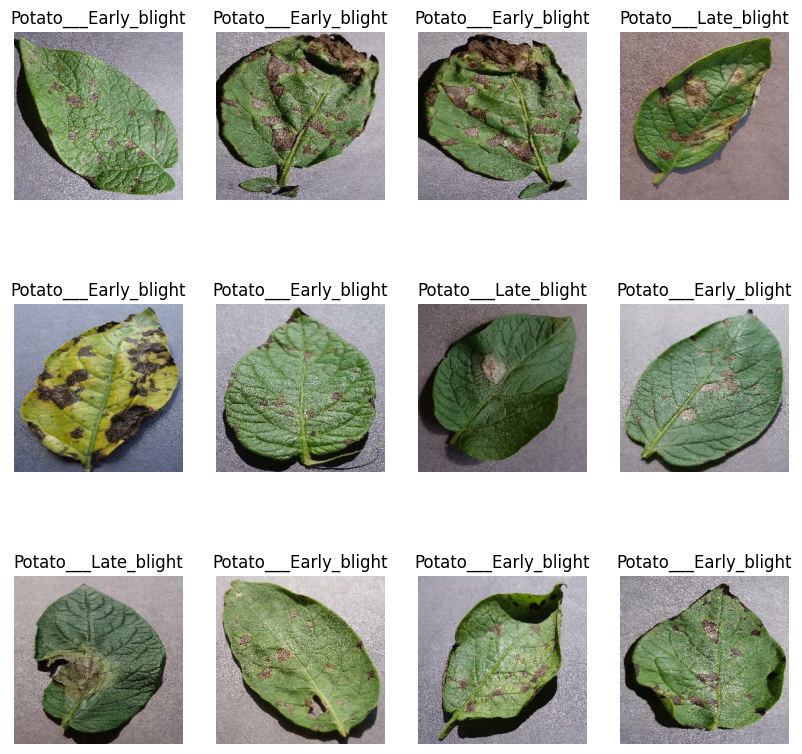

In [10]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    # Code to process the first batch of images and labels
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [11]:
len(dataset)

68

In [12]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [13]:
train_ds = dataset.take(54)
len(train_ds)

54

In [14]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [16]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [17]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [18]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [19]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
len(test_ds)

8

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE), # Removed tf.keras.layers.experimental.preprocessing
  tf.keras.layers.Rescaling(1./255), # Removed tf.keras.layers.experimental.preprocessing
])

In [25]:
!pip install --upgrade tensorflow # upgrade tensorflow to the latest version
import tensorflow as tf
from tensorflow import keras
from keras import layers

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"), # removed layers.experimental.preprocessing
  layers.RandomRotation(0.2), # removed layers.experimental.preprocessing
])

In [26]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
# input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
# n_classes = 3

# model = models.Sequential([
#     resize_and_rescale,
#     layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(n_classes, activation='softmax'),
# ])

# model.build(input_shape=input_shape)


#vgg16
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

# Set the number of classes
n_classes = 3

# Load the VGG16 model, without the top (fully connected layers), and specify the input shape
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNEL), include_top=False, weights='imagenet')

# Freeze the convolutional base
base_model.trainable = False

# Create a new model
model = models.Sequential([
    # Add the base VGG16 model
    base_model,

    # Flatten the output layer to 1 dimension
    layers.Flatten(),

    # Add a fully connected layer
    layers.Dense(64, activation='relu'),

    # Add the output layer with softmax activation for classification
    layers.Dense(n_classes, activation='softmax')
])

# Build the model
model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL))

# Print model summary
model.summary()



#vgg19
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG19

# Parameters
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNEL = 3
n_classes = 3

# Preprocessing layer (resize and rescale)
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255),
])

# Load the VGG19 model without the top layers and with pre-trained ImageNet weights
base_model = VGG19(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNEL), include_top=False, weights='imagenet')

# Freeze the convolutional base to prevent its weights from being updated during training
base_model.trainable = False

# Build the new model using VGG19 as the feature extractor
vgg19_model = models.Sequential([
    resize_and_rescale,  # Custom preprocessing layer
    base_model,  # VGG19 base model
    layers.Flatten(),  # Flatten the output from the VGG19 base model
    layers.Dense(64, activation='relu'),  # Add a fully connected layer
    layers.Dense(n_classes, activation='softmax')  # Output layer for classification
])

# Build the model with input shape
vgg19_model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL))

# Print the model summary
vgg19_model.summary()


#resnet9
import tensorflow as tf
from tensorflow.keras import layers, models

# Parameters
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNEL = 3
n_classes = 3

# Preprocessing layer
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255),
])

# Define a simplified residual block
def residual_block(x, filters, downsample=False):
    identity = x

    if downsample:
        x = layers.Conv2D(filters, (3, 3), strides=2, padding='same')(x)
    else:
        x = layers.Conv2D(filters, (3, 3), strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)

    if downsample:
        identity = layers.Conv2D(filters, (1, 1), strides=2)(identity)

    x = layers.add([x, identity])
    x = layers.ReLU()(x)
    return x

# Build the ResNet9 model
inputs = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNEL))

x = resize_and_rescale(inputs)

# Initial convolution layer
x = layers.Conv2D(64, (3, 3), strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

# MaxPooling layer
x = layers.MaxPooling2D((2, 2))(x)

# Residual Block 1 (Conv Layer + Identity)
x = residual_block(x, 64)

# Residual Block 2 (with downsampling)
x = residual_block(x, 128, downsample=True)

# Residual Block 3 (with downsampling)
x = residual_block(x, 256, downsample=True)

# Residual Block 4 (with downsampling)
x = residual_block(x, 512, downsample=True)

# Global Average Pooling and Dense layers
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(n_classes, activation='softmax')(x)

# Create the model
resnet9_model = models.Model(inputs, outputs)

# Build the model
resnet9_model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL))

# Print the model summary
resnet9_model.summary()













#resnet50
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications.resnet50 import ResNet50

# Parameters
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNEL = 3
n_classes = 3

# Preprocessing layer
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255),
])

# Load the ResNet50 model with pre-trained ImageNet weights, excluding the top layers
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNEL))

# Freeze the base model to prevent training its layers
base_model.trainable = False

# Build the new ResNet50-based model
resnet50_model = models.Sequential([
    resize_and_rescale,  # Preprocessing layer
    base_model,  # ResNet50 as the feature extractor
    layers.GlobalAveragePooling2D(),  # Global pooling instead of flattening
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(n_classes, activation='softmax')  # Output layer for classification
])

# Build the model
resnet50_model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL))

# Print model summary
resnet50_model.summary()



#alexnet
import tensorflow as tf
from tensorflow.keras import layers, models

# Parameters
BATCH_SIZE = 32
IMAGE_SIZE = 227  # AlexNet uses 227x227 as input size
CHANNEL = 3
n_classes = 3

# Preprocessing layer
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255),
])

# Define the AlexNet model
alexnet_model = models.Sequential([
    resize_and_rescale,  # Preprocessing Layer

    # 1st Convolutional Layer
    layers.Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNEL)),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),

    # 2nd Convolutional Layer
    layers.Conv2D(256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),

    # 3rd Convolutional Layer
    layers.Conv2D(384, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),

    # 4th Convolutional Layer
    layers.Conv2D(384, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),

    # 5th Convolutional Layer
    layers.Conv2D(256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),

    # Flatten the output
    layers.Flatten(),

    # 1st Fully Connected Layer
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    # 2nd Fully Connected Layer
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    # Output Layer (for classification)
    layers.Dense(n_classes, activation='softmax')
])

# Build the model
alexnet_model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL))

# Print the model summary
alexnet_model.summary()



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (32, 8, 8, 512)             │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 32768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,099 (64.13 MB)

 Trainable params: 2,097,411 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg19 (Functional)                   │ (32, 8, 8, 512)             │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 32768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,121,795 (84.39 MB)

 Trainable params: 2,097,411 (8.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_5 (Sequential) │ (None, 256, 256, 3)    │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │          1,792 │ sequential_5[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 256, 256, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ re_lu[0][0]            │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128, 128, 64)   │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 128, 128, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ re_lu_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128, 128, 64)   │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 128, 128, 64)   │              0 │ batch_normalization_2… │
│                           │                        │                │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 128, 128, 64)   │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64, 64, 128)    │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_3 (ReLU)            │ (None, 64, 64, 128)    │              0 │ batch_normalization_3… │
├──────────────────────

 Total params: 4,936,195 (18.83 MB)

 Trainable params: 4,932,227 (18.81 MB)

 Non-trainable params: 3,968 (15.50 KB)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (32, 8, 8, 2048)            │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (32, 2048)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (32, 64)                    │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,719,043 (90.48 MB)

 Trainable params: 131,331 (513.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)            │ (32, 227, 227, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (32, 55, 55, 96)            │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 27, 27, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (32, 27, 27, 256)           │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 13, 13, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (32, 13, 13, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (32, 13, 13, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (32, 13, 13, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 6, 6, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (32, 9216)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (32, 4096)                  │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 4096)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (32, 4096)                  │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 4096)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (32, 3)                     │          12,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,293,635 (222.37 MB)

 Trainable params: 58,293,635 (222.37 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming we have test data as X_test and y_test
# X_test = np.random.rand(100, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)  # Replace with actual test data
# y_test = np.random.randint(0, n_classes, 100)  # Replace with actual labels

# Store the models in a dictionary for easy access
models_dict = {
    'VGG16': model,
    'VGG19': vgg19_model,
    'ResNet9': resnet9_model,
    'ResNet50': resnet50_model,
    'AlexNet': alexnet_model
}

# Initialize a list to store the results
results = []

# Loop over the models and compute metrics
for model_name, model_instance in models_dict.items():
    # Check the input shape of the model
    input_shape = model_instance.input_shape[1:]  # Remove batch size from shape

    # Resize X_test to match the model's input shape
    X_test_resized = tf.image.resize(X_test, input_shape[:2])

    # Predict the classes
    y_pred = np.argmax(model_instance.predict(X_test_resized), axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append results to the list
    results.append([model_name, accuracy, precision, recall, f1])

# Create a DataFrame to display the results in a table
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the table
print(results_df)

4/4 ━━━━━━━━━━━━━━━━━━━━ 86s 18s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 101s 23s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/4 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
      Model  Accuracy  Precision  Recall  F1 Score
0     VGG16      0.34   0.293415    0.34  0.255715
1     VGG19      0.29   0.084100    0.29  0.130388
2   ResNet9      0.30   0.090000    0.30  0.138462
3  ResNet50      0.30   0.090000    0.30  0.138462
4   AlexNet      0.41   0.168100    0.41  0.238440


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [1]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=1,
)

NameError: name 'model' is not defined

In [ ]:
scores = model.evaluate(test_ds)

1/8 ━━━━━━━━━━━━━━━━━━━━ 1:22 12s/step - accuracy: 0.7812 - loss: 0.7833

KeyboardInterrupt: 

In [ ]:
model.save("model.h5")

In [ ]:
print(history)
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 2, 'steps': 54}
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [1]:
history.history['loss'][:5] # show loss for first 5 epochs

NameError: name 'history' is not defined

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

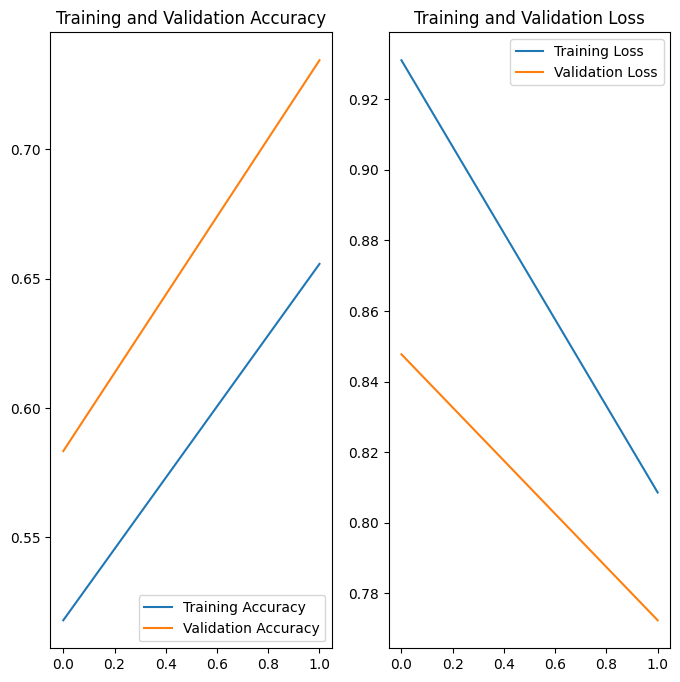

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model = tf.keras.models.load_model('model.h5')
model.summary()

ValueError: Layer "dense_8" expects 1 input(s), but it received 2 input tensors. Inputs received: [<KerasTensor shape=(None, 8, 8, 2048), dtype=float32, sparse=False, name=keras_tensor_1492>, <KerasTensor shape=(None, 8, 8, 2048), dtype=float32, sparse=False, name=keras_tensor_1493>]

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
predicted label: Potato___Late_blight


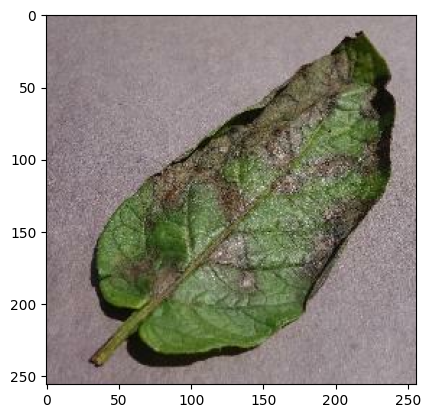

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


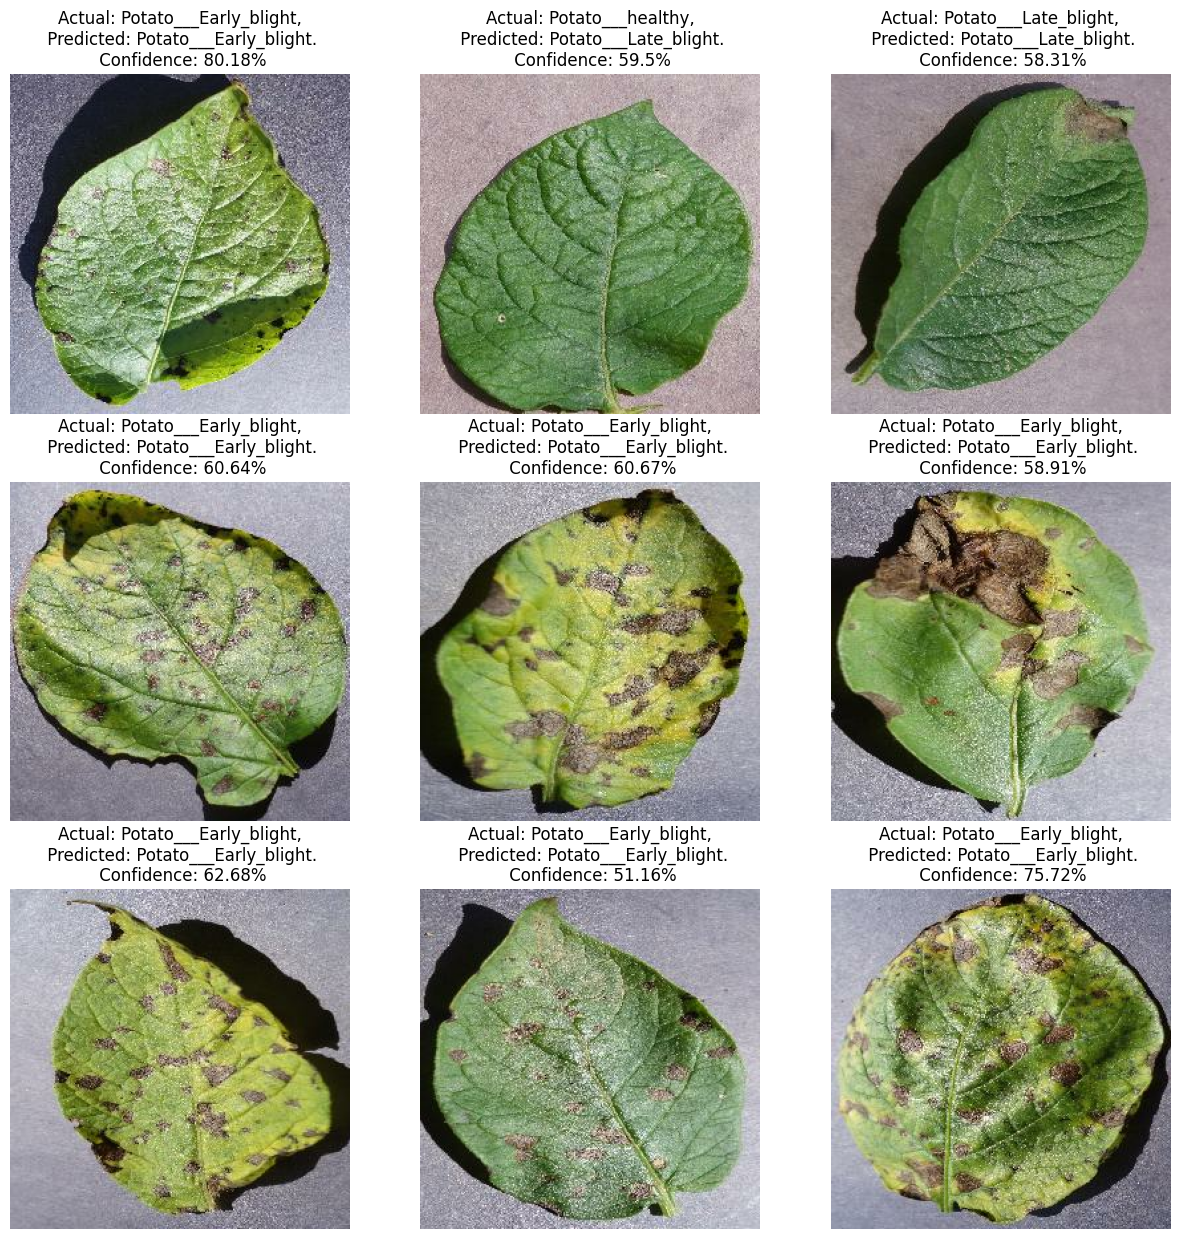

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
import zipfile
import os
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

# Path to the zip file (assuming it's located in /content directory)
zip_path = '/content/PlantVillage.zip'

# Directory to extract the contents (you can change this to your preferred path)
extract_dir = '/content/path_to_extract_directory'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted files to {extract_dir}")

BATCH_SIZE = 32
IMAGE_SIZE = 255
CHANNEL = 3
EPOCHS = 2


import tensorflow as tf

# Define the image size and batch size
IMAGE_SIZE = 256  # Image size, adjust as needed
BATCH_SIZE = 32   # Batch size, adjust as needed

# Correct the path to the extracted directory where PlantVillage is located
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/path_to_extract_directory/PlantVillage',   # Correct path to the PlantVillage directory
    seed=123,                    # Seed for shuffling
    shuffle=True,                # Shuffle the dataset
    image_size=(IMAGE_SIZE, IMAGE_SIZE),  # Resize images to the specified size
    batch_size=BATCH_SIZE        # Batch size for training
)

# Optional: print a summary of the dataset
print(f"Dataset loaded with {len(dataset)} batches of size {BATCH_SIZE}")


for image_batch,label_batch in dataset.take(1):
    print("Image Batch Shape : ", image_batch.shape)
    print("Single Image : ", image_batch[0])
    print("Label Image numpy : ", label_batch.numpy)

plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    # Code to process the first batch of images and labels
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")



def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)



resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE), # Removed tf.keras.layers.experimental.preprocessing
  tf.keras.layers.Rescaling(1./255), # Removed tf.keras.layers.experimental.preprocessing
])


!pip install --upgrade tensorflow # upgrade tensorflow to the latest version
import tensorflow as tf
from tensorflow import keras
from keras import layers

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"), # removed layers.experimental.preprocessing
  layers.RandomRotation(0.2), # removed layers.experimental.preprocessing
])


train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications.resnet50 import ResNet50  # Correct import for ResNet50


# Parameters
BATCH_SIZE = 32 # Add BATCH_SIZE to global parameters
IMAGE_SIZE = 256 # Add IMAGE_SIZE to global parameters
CHANNEL = 3 # Add CHANNEL to global parameters
# input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL) # Remove this line, as it is not needed.
n_classes = 3

# Load the ResNet50 model with pre-trained ImageNet weights and exclude the top layers
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNEL)) # Remove BATCH_SIZE from input_shape

# Freeze the base model to prevent training its layers
base_model.trainable = False

# Build the new model
model = models.Sequential([
    resize_and_rescale,  # Custom preprocessing layer
    base_model,  # ResNet50 as the feature extractor
    layers.GlobalAveragePooling2D(),  # Global pooling instead of flattening
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(n_classes, activation='softmax')  # Output layer
])

# Build the model with a defined input shape
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)) # Define input shape with flexible batch dimension

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# View the model summary
model.summary()


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=2,
)


